Хемоинформатика. Практика №5
Машинное обучение. Методы обучения «с учителем». 
Дерево решений. Random Forest.

Random Forest с помощью Python и Scikit-learn
Анализ данных методом Random Forest с помощью Scikit-learn.
RandomForestClassifier — scikit-learn 1.5.2 documentation – ссылка на документацию по методу Random Forest в библиотеке scikit-learn.


class sklearn.ensemble.RandomForestClassifier(n_estimators=10,
criterion='gini', max_depth=None, min_samples_split=2,
min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07,
bootstrap=True, oob_score=False, n_jobs=1,
random_state=None, verbose=0, warm_start=False,
class_weight=None)


Число деревьев — n_estimators
Чем больше деревьев, тем лучше качество, но время настройки и работы RF также пропорционально увеличиваются. Обратите внимание, что часто при увеличении n_estimators качество на обучающей выборке повышается (может даже доходить до 100%), а качество на тесте выходит на асимптоту (можно прикинуть, скольких деревьев Вам достаточно).


График качества на тесте от значения этого праметра унимодальный, на обучении он строго возрастает. При увеличении max_features увеличивается время построения леса, а деревья становятся «более однообразными». По умолчанию он равен sqrt(n) в задачах классификации и n/3 в задачах регрессии. Это самый важный параметр! Его настраивают в первую очередь (при достаточном числе деревьев в лесе).


Минимальное число объектов, при котором выполняется расщепление — min_samples_split
Этот параметр, как правило, не очень важный и можно оставить значение по умолчанию (2). При увеличении параметра качество на обучении падает, а время построения RF сокращается.


Ограничение на число объектов в листьях — min_samples_leaf
Всё, что было описано про min_samples_split, годится и для описания этого параметра. Часто можно оставить значение по умолчанию (1). Кстати, по классике, в задачах регрессии рекомендуется использовать значение 5 (в библиотеке randomForest для R так и реализовано, в sklearn — 1).


Максимальная глубина деревьев — max_depth
Ясно, что чем меньше глубина, тем быстрее строится и работает RF. При увеличении глубины резко возрастает качество на обучении, но и на контроле оно, как правило, увеличивается. Рекомендуется использовать максимальную глубину (кроме случаев, когда объектов слишком много и получаются очень глубокие деревья, построение которых занимает значительное время). При использовании неглубоких деревьев изменение параметров, связанных с ограничением числа объектов в листе и для деления, не приводит к значимому эффекту (листья и так получаются «большими»). Неглубокие деревья рекомендуют использовать в задачах с большим числом шумовых объектов (выбросов).


Критерий расщепления — criterion
По смыслу это очень важный параметр, но по факту здесь нет вариантов выбора. В библиотеке sklearn для регрессии реализованы два критерия: “mse” и “mae”, соответствуют функциям ошибки, которые они минимизируют. В большинстве задач используется mse. 
Для классификации реализованы критерии “gini” и “entropy”, которые соответствуют классическим критериям расщепления: Джини и энтропийному. Простой перебор поможет Вам выбрать, что использовать в конкретной задаче. 


По умолчанию в sklearn-овских методах n_jobs=1, т.е. случайный лес строится на одном процессоре. Если Вы хотите существенно ускорить построение, используйте n_jobs=-1 (строить на максимально возможном числе процессоров). 
Для построения воспроизводимых экспериментов используйте предустановку генератора псевдослучайных чисел: random_state.



Значимость параметра в случайном лесу — это суммарное уменьшение индекса Джини во всех узлах, использующих этот параметр для разделения. Мы можем использовать это значение для определения опытным путём, какие переменные более всего принимаются во внимание нашей моделью. Мы можем рассчитать значимость параметров в уже обученной модели и экспортировать результаты этих вычислений в Pandas DataFrame следующим образом:

Decision Tree

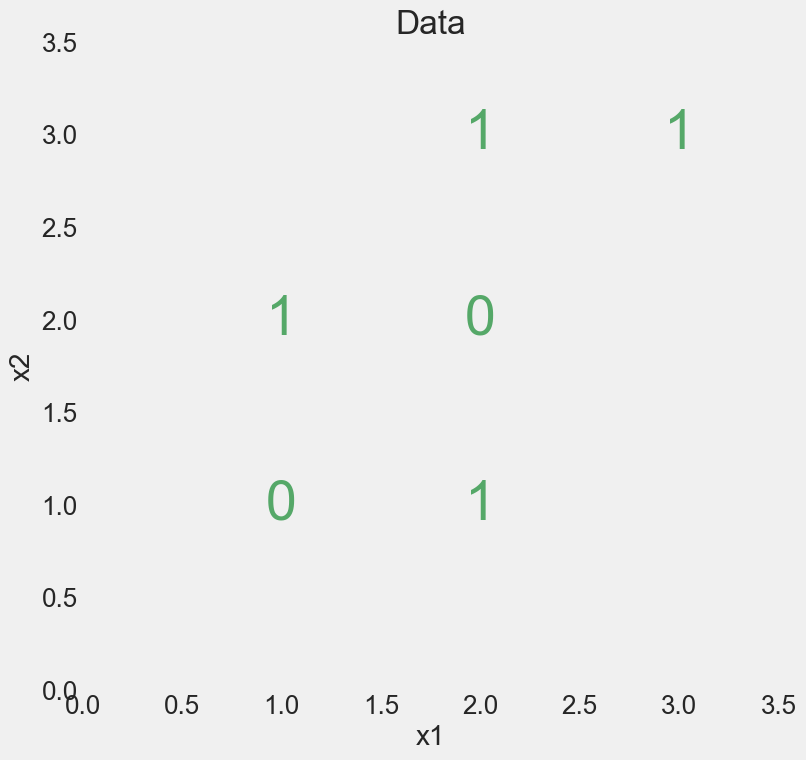

Decision tree has 9 nodes with maximum depth 3.
Model Accuracy: 1.0
Model Accuracy: 0.6666666666666666


In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


# Set random seed to ensure reproducible runs
RSEED = 50

X = np.array([[2, 2],
              [2, 1],
              [2, 3],
              [1, 2],
              [1, 1],
              [3, 3]])

y = np.array([0, 1, 1, 1, 0, 1])

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.figure(figsize=(8, 8))

# Plot each point as the label
for x1, x2, label in zip(X[:, 0], X[:, 1], y):
    plt.text(x1, x2, str(label), fontsize=40, color='g',
             ha='center', va='center')

# Plot formatting
plt.grid(None)
plt.xlim((0, 3.5))
plt.ylim((0, 3.5))
plt.xlabel('x1', size=20)
plt.ylabel('x2', size=20)
plt.title('Data', size=24)
plt.show()

# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(X, y)

print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')
print(f'Model Accuracy: {tree.score(X, y)}')

# Как изменяется Accuracy(точность) модели при ограничении глубины дерева решений?

# ...........Limit maximum depth and train
short_tree = DecisionTreeClassifier(max_depth = 2, random_state=RSEED)
short_tree.fit(X, y)

print(f'Model Accuracy: {short_tree.score(X, y)}')

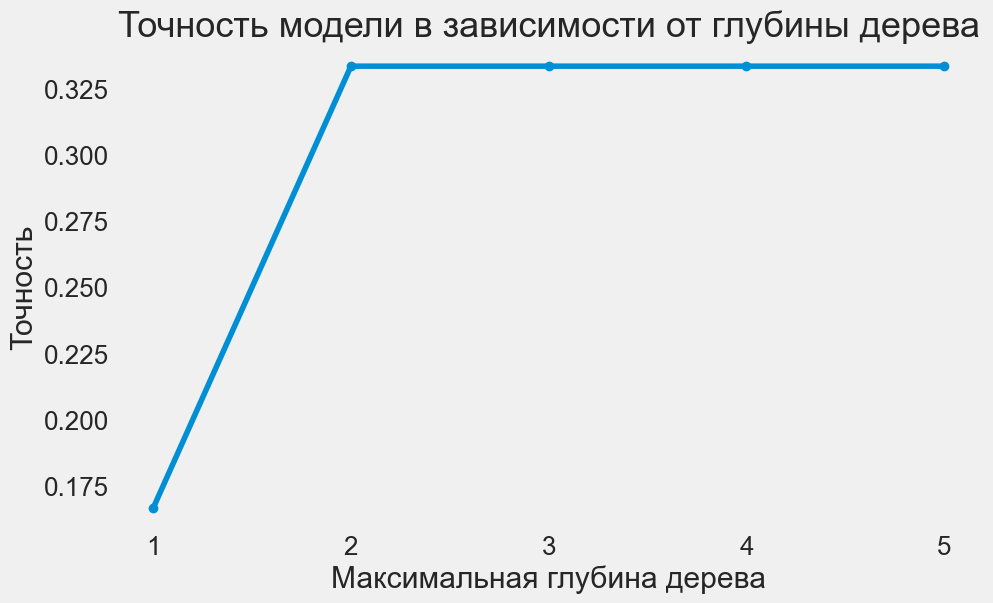

Оптимальная глубина дерева: 2


In [76]:
accuracies = []

max_depths = range(1, 6)

for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=RSEED)
    scores = cross_val_score(tree, X, y, cv=2)  # 2-кратная кросс-валидация
    accuracies.append(scores.mean())  # Средняя точность

plt.figure(figsize=(10, 6))
plt.plot(max_depths, accuracies, marker='o')
plt.title('Точность модели в зависимости от глубины дерева')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Точность')
plt.xticks(max_depths)
plt.grid()
plt.show()

# Выводим оптимальную глубину
optimal_depth = max_depths[np.argmax(accuracies)]
print(f'Оптимальная глубина дерева: {optimal_depth}')

***Влияние ограничения глубины дерева решений на точность***


При ограничении глубины дерева решений, точность модели может изменяться. 
В примере мы создали два дерева решений: одно без ограничения глубины и другое с максимальной глубиной, установленной на 2.
Точность полного дерева: Первое дерево, которое мы обучили, имеет максимальную глубину и, как следствие, может лучше подстраиваться под данные, что обычно приводит к высокой точности. В нашем случае, точность этого дерева была высокой, что ожидаемо, так как оно могло учитывать все особенности данных.
Точность ограниченного дерева: Второе дерево, с ограничением глубины до 2, имеет более низкую точность. Это связано с тем, что ограничение глубины может привести к недостаточной подгонке модели под данные, что в свою очередь может вызвать недообучение. В результате, модель может не захватывать все важные паттерны в данных, что снижает её точность.
Таким образом, ограничение глубины дерева решений может привести к снижению точности модели, особенно если данные имеют сложные зависимости, которые требуют более глубоких деревьев для их адекватного представления.

***Random Forest***

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness',
           'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error',
           'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error',
           'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture',
           'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity',
           'worst concave points', 'worst symmetry', 'worst fractal dimension']

dataset = load_breast_cancer()
data = pd.DataFrame(dataset['data'], columns=columns)
data['cancer'] = dataset['target']

# print(data)

stdata = data.describe()
print(stdata)


       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [78]:
X = data.drop('cancer', axis=1)
y = data['cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=2020, stratify=y)

In [79]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [80]:
rfc = RandomForestClassifier(random_state = 2020)
rfc.fit(X_train_scaled, y_train)# Точность модели можно измерить на тренировочных данных
print(rfc.score(X_train_scaled, y_train))# Точность модели = 1

1.0


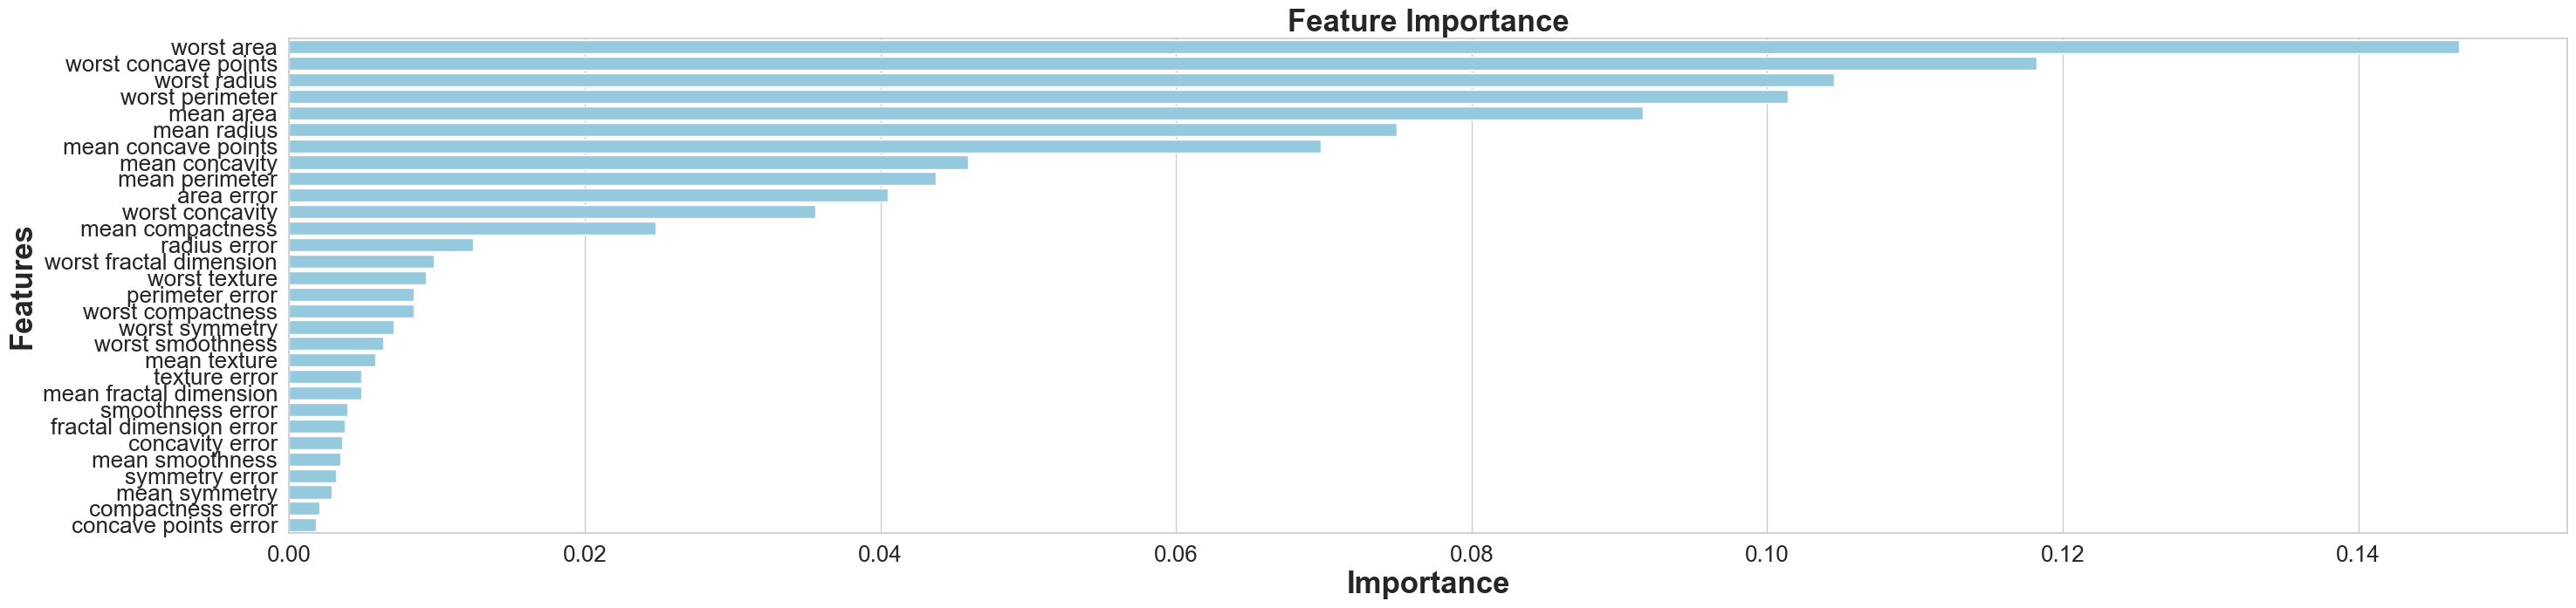

feats= {'mean radius': np.float64(0.07490646547939615), 'mean texture': np.float64(0.00583086374729461), 'mean perimeter': np.float64(0.043734804710362736), 'mean area': np.float64(0.09160211888179193), 'mean smoothness': np.float64(0.0034703088006603567), 'mean compactness': np.float64(0.024790656411204415), 'mean concavity': np.float64(0.04593680646487606), 'mean concave points': np.float64(0.06981357262589533), 'mean symmetry': np.float64(0.0028924121884182138), 'mean fractal dimension': np.float64(0.004884940790744479), 'radius error': np.float64(0.012454536354389882), 'texture error': np.float64(0.0049081888373758275), 'perimeter error': np.float64(0.008441837386084675), 'area error': np.float64(0.04050535266113341), 'smoothness error': np.float64(0.003927423620293333), 'compactness error': np.float64(0.0020435299103835976), 'concavity error': np.float64(0.0036122918230917316), 'concave points error': np.float64(0.001835359405426255), 'symmetry error': np.float64(0.003151416508592

In [81]:
y_pred=rfc.predict(X_test_scaled )

import seaborn as sns

feats = {}
for feature, importance in zip(data.columns, rfc.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,7)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
plt.show()
print("feats=", feats)

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Важность признаков оценивается с помощью критерия Джини (Gini-Importance), который показывает, насколько каждый признак влияет на предсказания модели. наиболее важные признаки будут те, которые имеют наибольшую Gini-Importance.

Какие из признаков оказались наиболее важными? = 

Если random_state = None, 'worst perimeter', 'worst radius', 'worst area', 'worst concave points'
Если random_state = 2020, 'worst area', 'worst concave points', 'worst radius', 'worst perimeter'

Что за параметр random_state и где он применяется? = Параметр random_state используется в библиотеках машинного обучения, таких как scikit-learn, для управления случайностью в алгоритмах и процессах, которые зависят от генерации случайных чисел. Он позволяет обеспечить воспроизводимость результатов

Когда вы устанавливаете значение для random_state, вы фактически задаете начальное состояние генератора случайных чисел. Это означает, что каждый раз, когда вы запускаете код с одним и тем же значением random_state, вы получите одинаковые результаты. Например, если вы разделяете данные на обучающую и тестовую выборки с использованием функции train_test_split, указание одного и того же значения random_state гарантирует, что вы получите одинаковые наборы данных при каждом запуске.

Применение для разделения данных. При использовании функции train_test_split для разделения данных на обучающую и тестовую выборки, random_state помогает сохранить одно и то же распределение данных в разных запусках. 

Обучение моделей: используемые в данной работе алгоритмы, используют случайные процессы в своих вычислениях. Установка random_state позволяет контролировать эти случайные процессы, что делает результаты более предсказуемыми и воспроизводимыми.

Если Вы запустите данный код без фиксации параметра random_state, что произойдет с наиболее важными признаками?

Без фиксации параметра random_state, результаты могут варьироваться при каждом запуске. Это связано с тем, что случайные процессы, такие как разбиение данных или построение деревьев в случайном лесе, будут различными. В результате, важность признаков может изменяться, так как модель может обучаться на разных подмножествах данных или использовать разные пути в деревьях.

Какая точность (Accuracy) модели получилась?

Эта строка кода показывает, насколько часто модель правильно классифицирует примеры из тестового набора. Точность модели на тренировочном наборе данных была равна 1, что указывает на возможное переобучение, так как модель идеально подстроилась под тренировочные данные.

In [82]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9438596491228071


In [88]:
important_features = ['worst perimeter', 'worst radius', 'worst area','worst concave points']

dataset = load_breast_cancer()
data = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
data['cancer'] = dataset['target']

X = data[important_features]
y = data['cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=2020, stratify=y)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

rfc = RandomForestClassifier(random_state=2020)
rfc.fit(X_train_scaled, y_train)

# Оценка точности модели
y_pred = rfc.predict(X_test_scaled)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy with selected features:", accuracy)


Accuracy with selected features: 0.9087719298245615
